# Logistic Regression from scratch

After finishing one of the courses I want to recap wy knowledge and implement Logistic Regression from scratch.$\newline$
At first let's import all libraries that we need for this task:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
import copy

Let's generate some data for Logistic Regression and visualize it.

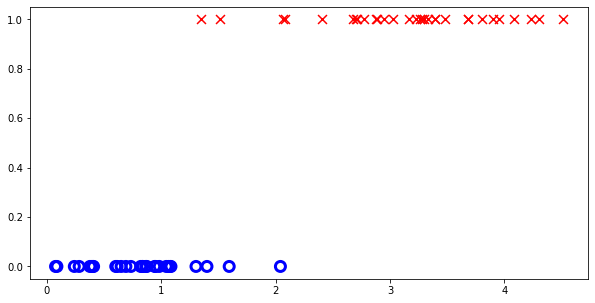

In [2]:
X, y = make_classification(n_samples=60, n_features=1,n_redundant=0,n_informative=1,n_classes=2,n_clusters_per_class=1,random_state=0)
X= X+2
fig,ax = plt.subplots(1,1,figsize=(10,5))
ax.scatter(X[y==1], y[y==1], marker='x', s=80, c = 'red')
ax.scatter(X[y==0], y[y==0], marker='o', s=100, facecolors='none', edgecolors='blue',lw=3)

Logistic Regression uses formula called $sigmoid$ :
$$g(z) = \frac{1}{1+e^{-z}}$$
Where $z$ is the output of the Linear Regression:
$$z = f_{\mathbf{w},b}(\mathbf{x}^{(i)}) =\mathbf{w} \cdot \mathbf{x}^{(i)} + b $$

In [3]:
def sigmoid(z):
    sigm = 1/(1+np.exp(-z))
    return sigm

The cost function for Logistic regression is:
$$ J(\mathbf{w},b) = \frac{1}{m} \sum_{i=0}^{m-1} \left[ loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) \right]$$
Where $loss$ equals to:
    $$loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = (-y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right)$$

In [4]:
def cost_function(X,y,w,b):
    total_cost = 0.
    m = X.shape[0]
    for i in range(m):
        z = np.dot(X[i],w)+b
        g = sigmoid(z)
        total_cost += -y[i]*np.log(g) - (1-y[i])*np.log(1-g)
    total_cost/=m    
    return total_cost

Gradient descent algorithm is quite similar to Linear Regression's - we should iteratively simultaneously change our parameters $w$ and $b$ until we reach the convergence. And one iteration equals to:
$$\begin{align*}
&  \; \; \;w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \; & \text{for j := 0..n-1} \\ 
&  \; \; \;  \; \;b = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b} \\
\end{align*}$$

The only difference we have - is in the gradient (partial derivatives) here:
$$\begin{align*}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)} \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})  
\end{align*}$$
beacuse here $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ is our $g(z)$ - sigmoid function described earlier.

In [5]:
def compute_gradient(X,y,w,b):
    m,n = X.shape
    dJ_db = 0.
    dJ_dw = np.zeros((n,))
    for i in range(m):
        z = np.dot(X[i],w)+b
        g = sigmoid(z)
        error = g - y[i]
        for j in range(n):
            dJ_dw[j]+=error*X[i,j]
        dJ_db+=error
    dJ_db/=m
    dJ_dw/=m
    return dJ_db,dJ_dw

In [6]:
def gradient_descent(X,y,w,b,epsilon,alpha):
    old_cost = cost_function(X,y,w,b)
    convergence = False
    J_history = []
    while convergence == False:
        dJ_db, dJ_dw = compute_gradient(X,y,w,b)
        temp_w = w - alpha*dJ_dw
        temp_b = b - alpha*dJ_db
        new_cost = cost_function(X,y,temp_w,temp_b)
        if old_cost - new_cost <= epsilon:
            convergence = True
        else:
            old_cost = new_cost
            w = temp_w
            b = temp_b
        J_history.append( cost_function(X, y, w, b))
    return b,w,J_history

Here we will create a $predict$ fuction. The most interesting part of this function is $decision$ $boundary$ whch we can change to make or predictions more aligned with the purposes of the prediction. For example:if we are making a prediction if tumor is malignant - we don't want to rake a risk and set our $decision$ $boundary$ lower, beacuse "false positive" prediction will cause less damage to the person than "false negative".

In [7]:
def predict(X, w, b,decision_boundary): 
    m, n = X.shape   
    p = np.zeros(m)
    for i in range(m):   
        z_wb = np.dot(X[i],w)+b
        f_wb = sigmoid(z_wb)
        p[i] = f_wb
    p = p>decision_boundary
    return p

Here we'll find our parameters, make predictions based on a trainning set and gather some data fo further visualization:

In [8]:
m,n =X.shape
w = np.zeros((n,))
b = 0.
epsilon = 1e-6
alpha = 1e-3
decision_boundary = 0.6
b,w,J_hist_1 = gradient_descent(X,y,w,b,epsilon,alpha)
g = np.ones((m,))
z = np.ones((m,))

for i in range(m):
    pred = b + np.dot(w, X[i])
    z[i] = pred
    g[i] = 1/(1+np.exp(-pred))
    
pred_y = predict(X, w, b,decision_boundary)
print('b',b)
print('w',w)

b -3.69144107347565
w [2.19235193]


And some visualization routine:

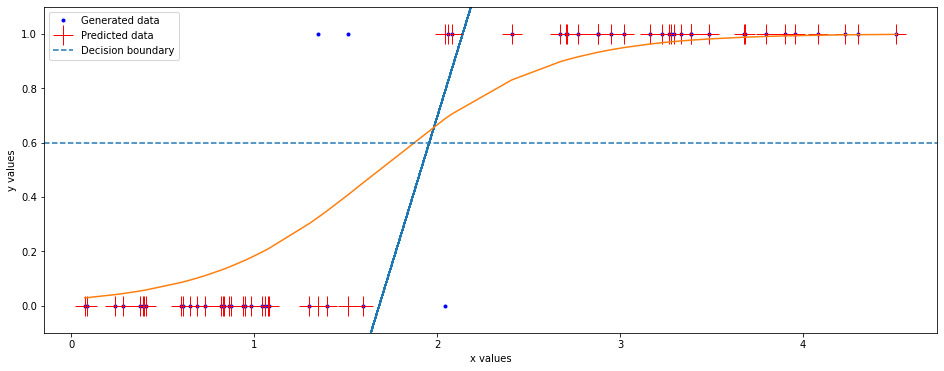

In [9]:
plt.figure(figsize=(16,6))
plt.xlabel("x values")
plt.ylabel("y values")
plt.plot(X,y,"b.",label = "Generated data")
plt.plot(X,z)
plt.plot(X,pred_y,'r+',label = "Predicted data", markersize=20)
plt.ylim((-0.1,1.1))
copy_X,g = zip(*sorted(zip(copy.deepcopy(X),g)))
plt.plot(copy_X,g)
plt.axhline(y=0.6,linestyle='--',label = "Decision boundary")
plt.legend()
plt.show()

And also let's find out what is the accuracy of our model based on training data:

In [10]:
np.count_nonzero(pred_y==y)/y.size

0.95

Look's like it works properly. If someone will find any errors - I'll be grateful to see the remarks in the comments.